In [246]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [248]:
bike = pd.read_csv("C:\\Users\\aryan\Vaishali\\day.csv")

In [251]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [252]:
bike.shape

(730, 16)

In [253]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [254]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Check for null values 

In [255]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [256]:
### from above check we can see there are no null values in the dataframe

In [257]:
## dropping date & Instant column as Date is already in other columns of Month and year and instant is like index only
## casudal and registered alsonot required as not much data info we will get for our target variable count

bike = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1 )

In [258]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


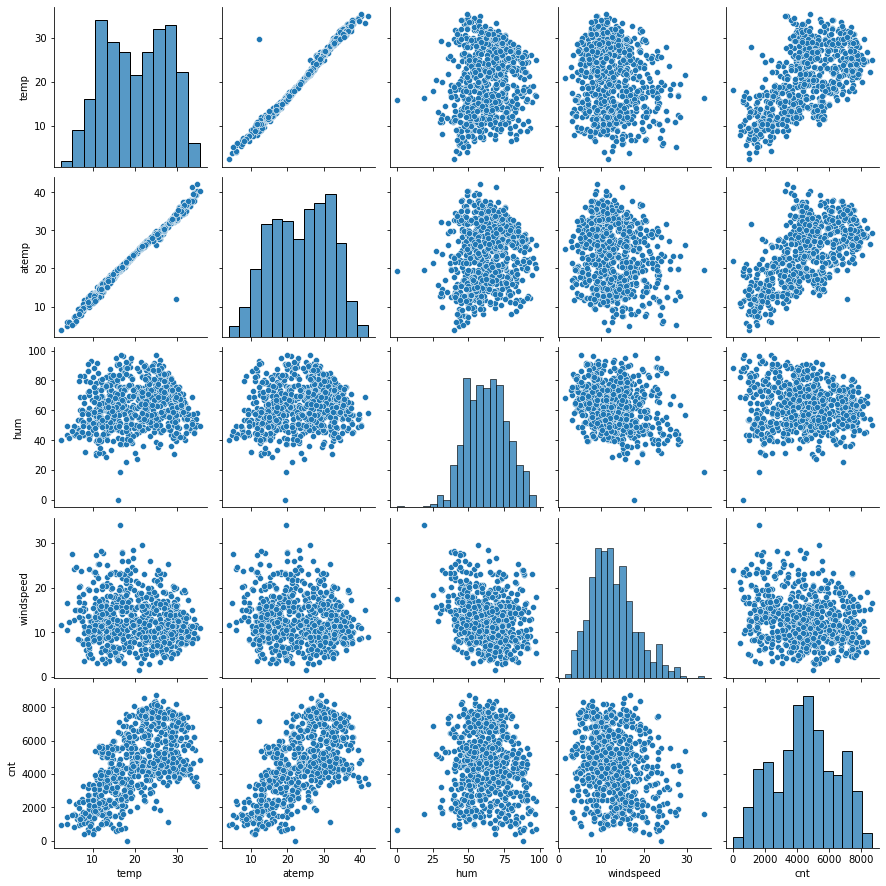

In [259]:
## visualising the numeric variables
sns.pairplot(data = bike, vars = ['temp','atemp','hum','windspeed','cnt' ] )
plt.show()

In [260]:
## From the above pairplot we can see linear relationship between atemp, temp & count

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

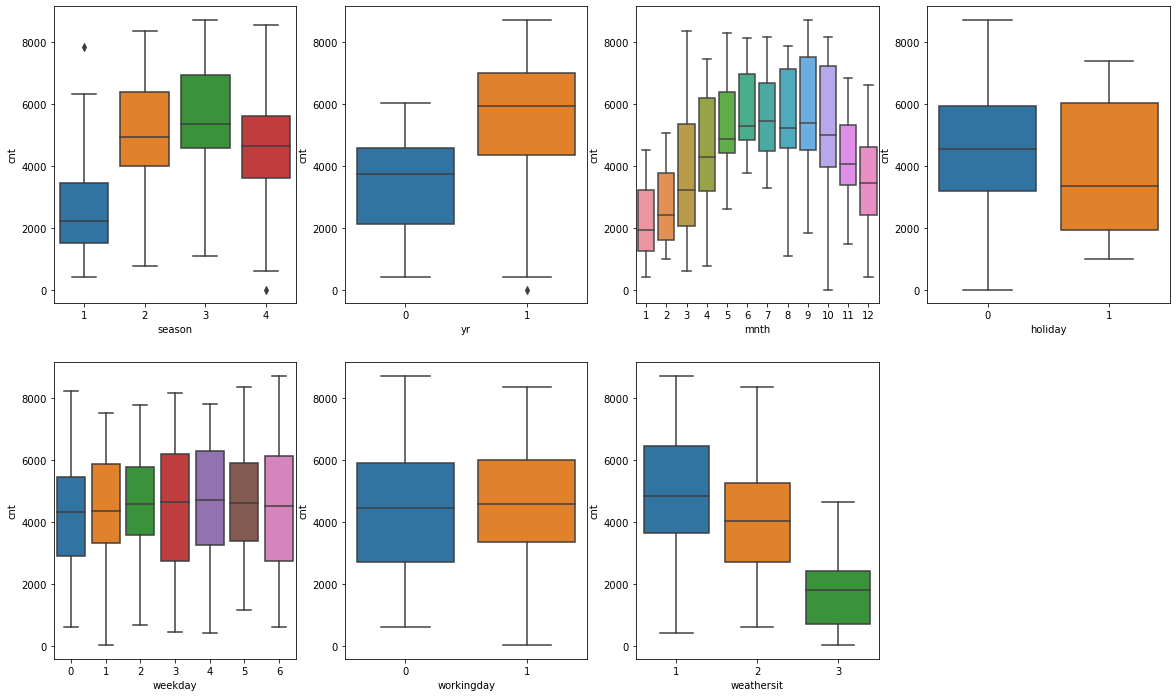

In [261]:
## visualising categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)

### Change 'weathersit' and 'season' to categorical variables

In [262]:
# Maping seasons
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping weathersit
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

#Mapping Weekday
bike.weekday = bike.weekday.map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thrusday", 5:"Friday", 6:"Saturday"})


import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [263]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Creating Dummy Variables

In [264]:
varslist = bike[ ['season', 'mnth', 'weekday', 'weathersit'] ]
varslist = pd.get_dummies(varslist,drop_first=True )

In [265]:
# Adding the dummy variables to the original dataset
bike = pd.concat( [varslist,bike], axis = 1)

In [266]:
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [267]:
bike.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [268]:
bike.drop([ 'season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [269]:
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


### Splitting the Data into Training and Testing Sets

In [270]:
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [271]:
df_train.shape

(510, 30)

In [272]:
df_test.shape

(219, 30)

### Rescaling the Features

In [273]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
#Instantiate an object
scaler = MinMaxScaler()

vars = ['cnt','hum','windspeed','temp','atemp']

df_train[vars] = scaler.fit_transform(df_train[vars])

In [274]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


### Correlation

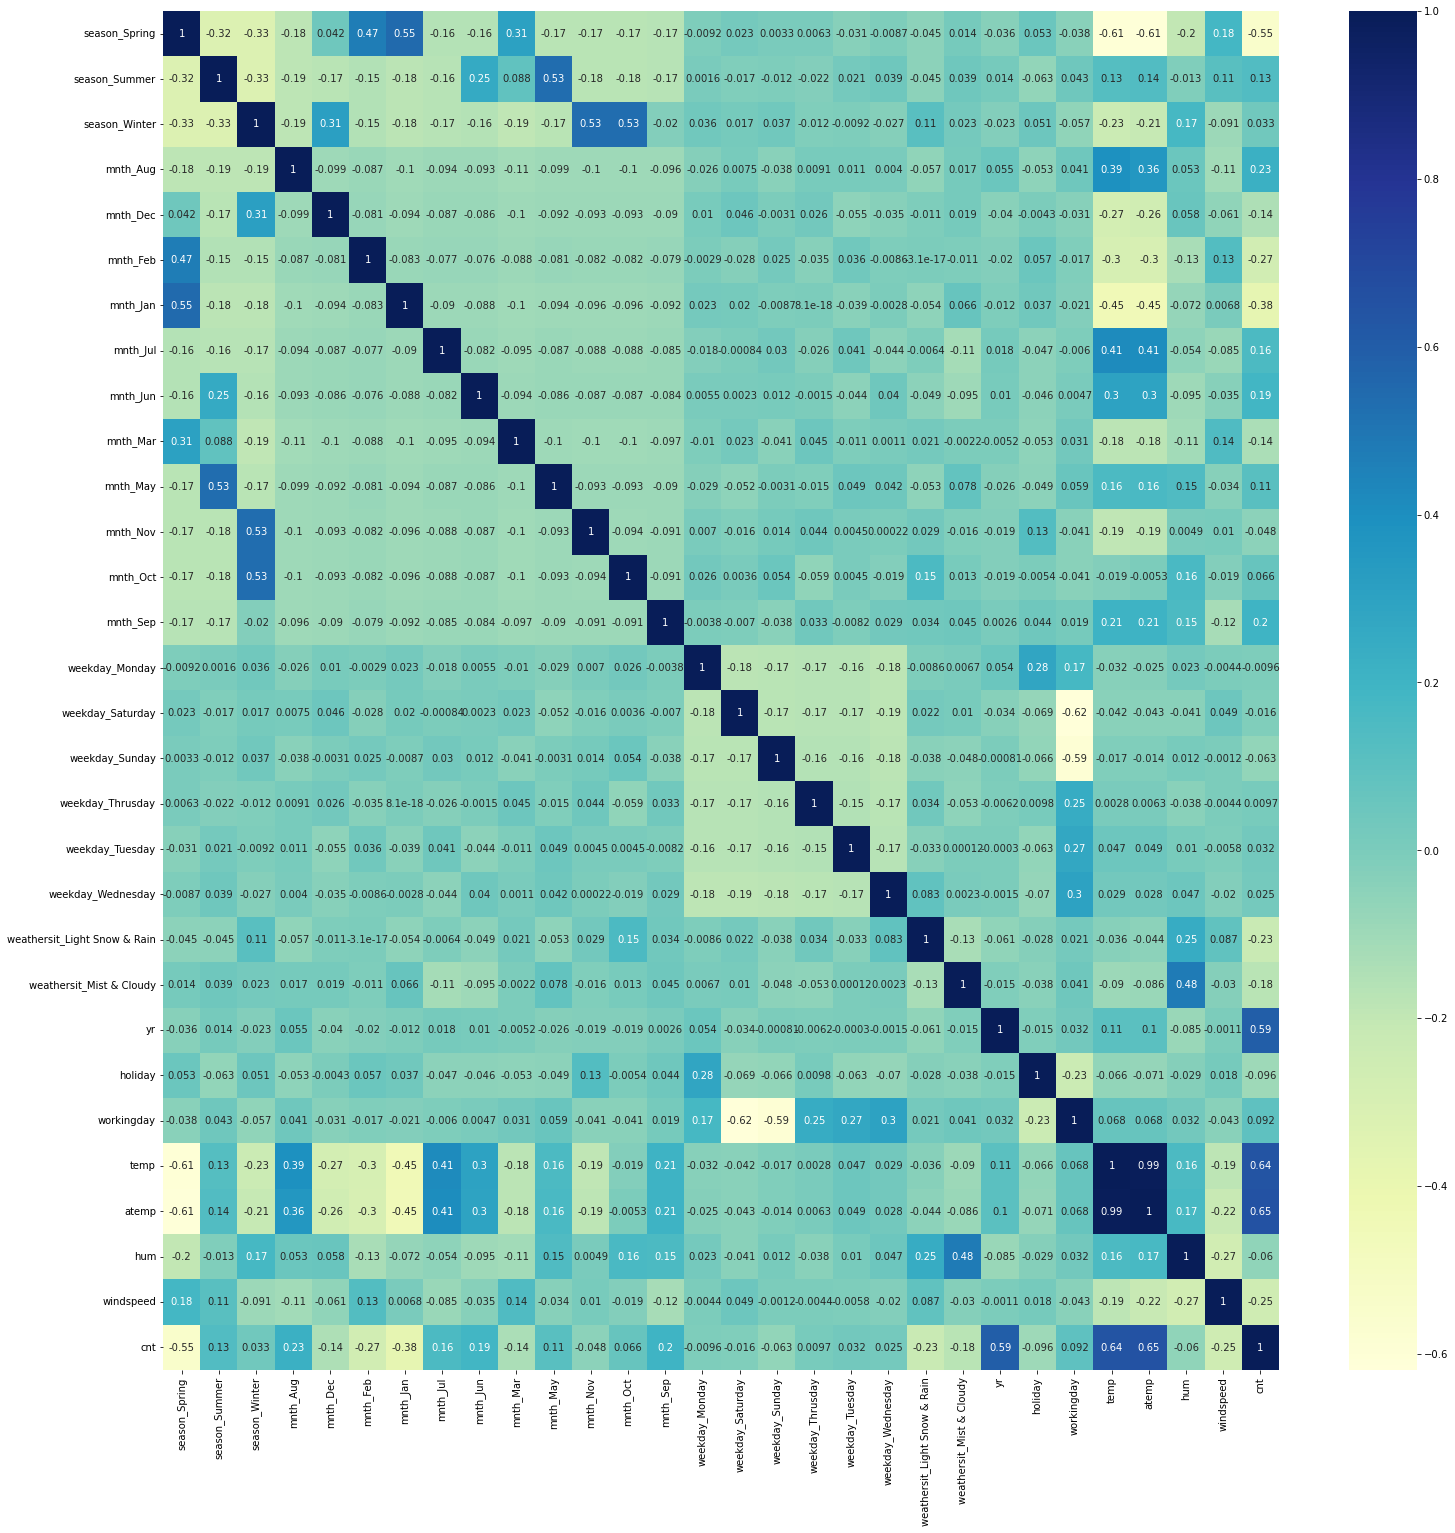

In [275]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [276]:
y_train = df_train.pop('cnt')
X_train = df_train

In [277]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [278]:
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


In [279]:
bike.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [280]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [281]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [282]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))


[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [283]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [284]:
# feature which are chosen by RFE during feature selection( unsupported columns)

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [285]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


## Model 1

In [286]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.31e-191
Time:                        17:20:31   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2510      0.036      6.949      0.000       0.180       0.322
season_Spring                   -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_Summer                    0.0497      0.015      3.346      0.001       0.020       0.079
season_Winter                    0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                        -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                        -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                         0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Saturday                 0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist & Cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
yr                               0.2305      0.008     28.807      0.000       0.215       0.246
holiday                         -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                       0.0435      0.012      3.781      0.000       0.021       0.066
temp                             0.5098      0.034     14.851      0.000       0.442       0.577
hum                             -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                       -0.1860      0.025     -7.301      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


### Model 2
    removing feature - Humidity due very high VIF values as all the p-values < 0.05.

In [288]:
X_train_rfe2 = X_train_rfe.drop('hum', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          7.33e-189
Time:                        17:21:01   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1737      0.031      5.525      0.000       0.112       0.235
season_Spring                   -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_Summer                    0.0434      0.015      2.890      0.004       0.014       0.073
season_Winter                    0.0797      0.017      4.650      0.000       0.046       0.113
mnth_Jan                        -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_Jul                        -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Sep                         0.0753      0.017      4.522      0.000       0.043       0.108
weekday_Saturday                 0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_Light Snow & Rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Mist & Cloudy        -0.0826      0.009     -9.592      0.000      -0.100      -0.066
yr                               0.2344      0.008     29.019      0.000       0.218       0.250
holiday                         -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                       0.0465      0.012      3.983      0.000       0.024       0.069
temp                             0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                       -0.1563      0.025     -6.292      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### Model 3

In [290]:
X_train_rfe3 = X_train_rfe2.drop('workingday', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.21e-186
Time:                        17:21:13   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2121      0.030      6.986      0.000       0.152       0.272
season_Spring                   -0.0613      0.021     -2.895      0.004      -0.103      -0.020
season_Summer                    0.0425      0.015      2.791      0.005       0.013       0.072
season_Winter                    0.0769      0.017      4.425      0.000       0.043       0.111
mnth_Jan                        -0.0383      0.018     -2.146      0.032      -0.073      -0.003
mnth_Jul                        -0.0512      0.019     -2.758      0.006      -0.088      -0.015
mnth_Sep                         0.0760      0.017      4.498      0.000       0.043       0.109
weekday_Saturday                 0.0201      0.011      1.788      0.074      -0.002       0.042
weathersit_Light Snow & Rain    -0.2869      0.025    -11.668      0.000      -0.335      -0.239
weathersit_Mist & Cloudy        -0.0808      0.009     -9.256      0.000      -0.098      -0.064
yr                               0.2346      0.008     28.628      0.000       0.219       0.251
holiday                         -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp                             0.4741      0.034     13.868      0.000       0.407       0.541
windspeed                       -0.1570      0.025     -6.231      0.000      -0.207      -0.108
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.16
12,windspeed,4.64
0,season_Spring,2.76
1,season_Summer,2.23
9,yr,2.07
2,season_Winter,1.80
3,mnth_Jan,1.61
4,mnth_Jul,1.59
8,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


### Model 4

In [292]:
X_train_rfe4 = X_train_rfe3.drop('weekday_Saturday', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          3.97e-187
Time:                        17:21:17   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2155      0.030      7.096      0.000       0.156       0.275
season_Spring                   -0.0615      0.021     -2.898      0.004      -0.103      -0.020
season_Summer                    0.0422      0.015      2.766      0.006       0.012       0.072
season_Winter                    0.0771      0.017      4.424      0.000       0.043       0.111
mnth_Jan                        -0.0380      0.018     -2.125      0.034      -0.073      -0.003
mnth_Jul                        -0.0507      0.019     -2.728      0.007      -0.087      -0.014
mnth_Sep                         0.0762      0.017      4.500      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
weathersit_Mist & Cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
yr                               0.2342      0.008     28.524      0.000       0.218       0.250
holiday                         -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                             0.4728      0.034     13.803      0.000       0.405       0.540
windspeed                       -0.1549      0.025     -6.140      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
0,season_Spring,2.75
1,season_Summer,2.22
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


In [294]:
y_train_pred = lr4.predict(X_train_lm4)

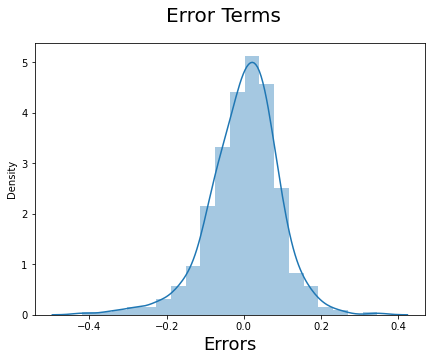

In [295]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Making Prediction Using Final Model

In [296]:
## Applying the scaling on the test sets

# Apply scaler() to all numeric variables in test dataset. 

df_test[vars] = scaler.transform(df_test[vars])
df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [297]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [298]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test.pop('cnt')
X_test = df_test

print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


In [299]:
#Selecting the variables that were part of final model (Model 4).
col_test = X_train_rfe4.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

X_test_lm4.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,windspeed
184,1.0,0,0,0,0,1,0,0,1,0,1,0.831783,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,0,0.901354,0.153728
299,1.0,0,0,1,0,0,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,1,0,0,0,0,0,0,0,0,0.817246,0.537414


In [300]:
# Making predictions using the final model (lr4)

y_test_pred = lr4.predict(X_test_lm4)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

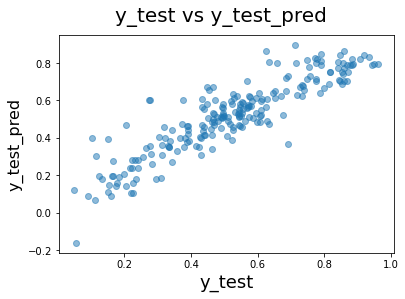

In [301]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

In [302]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))


Test data r^2 : 80.23
Train data r^2 : 83.73


### The equation for best fitted line based on Model 4

      Cnt = 0.2155 - (season_Spring∗0.0615)+(season_Summer∗0.0422)+ (Seasonwinter∗0.0771) - (Mnth_Jan*.0380) - (Mnth_Jul*.0507) +(Mnth_Sep*.0762)- (weathersit_Light Snow & Rain∗0.2864)−(weathersit_Mist & Cloudy	∗0.0807) + (Yr∗0.2342) - (holiday∗0.0973) + (temp∗0.4728)- (Windspeed∗0.1549)